## import

In [1]:
import cv2
import numpy as np
import PIL
from PIL import Image
import shutil,os,sys
import glob
from time import sleep
import time
import matplotlib.pyplot as plt
#import matplotlib.image as ImagePG

## 確認檔案

In [2]:
def CheckFile(path):
    filepath='Screen/transport/'+path.split("/")[-1] 
    if os.path.isfile(filepath):
        os.remove(filepath)

## 統一大小

In [3]:
#單改一張大小
def ChangeSize(filename):
        img=Image.open(filename)
        #尺寸轉換200x200
        img_new=img.resize((500,500),PIL.Image.ANTIALIAS)
        #注意斜線方向
        img_new.save('Screen/transport/'+filename.split("/")[-1] )

In [7]:
#去紅線print 圖結果
def Dilate(path):
    #灰階讀進
    image = cv2.imread(path, 0)
    #膨脹
    kernel = np.ones((3,3), np.uint8)
    #(圖檔案,捲機大小,迭代次數)
    dilate = cv2.dilate(image, kernel, iterations = 2)

    #降噪(中值濾波)，彌平紅線條
    image_mid_blur =cv2.medianBlur(dilate, 9) 
    #cv2.imwrite('Screen/transport/Test/1-'+path.split("/")[-1],image_mid_blur)
    
    #高斯濾波(影像,捲積核,標準差)，模糊鋸齒狀
    Gaussian=cv2.GaussianBlur(image_mid_blur,(15,15),0)
    
    #取邊緣(下線數值,上線數值)
    canny=cv2.Canny(Gaussian,10,80)
    
    #先膨脹再減侵蝕
    #侵蝕Kernel
    kernelN=np.ones((3,3),np.uint8)
    Negtive=cv2.erode(image_mid_blur,kernelN,iterations=1)
    #相減(前面膨脹-侵蝕)
    result=cv2.absdiff(image_mid_blur,Negtive)
    
    #反二值化更清楚(輸出rst)
    #thr,reverse=cv2.threshold(result,4,10,cv2.THRESH_BINARY_INV)

    #二值化(輸出forward)
    #thr,forward=cv2.threshold(result,4,10,cv2.THRESH_BINARY)
    
    #截斷設定
    #thr,capture=cv2.threshold(result,50,120,cv2.THRESH_TRUNC)
    
    #超零定址(大於歸0，小於保持)
    thr,supzeort=cv2.threshold(result,4,100,cv2.THRESH_TOZERO_INV)
    
    #定值設定(大於保持,小於歸0)
    thr,zeort=cv2.threshold(result,4,100,cv2.THRESH_TOZERO)
    
    #方框濾波
    
    

    ''' 
    #原圖laplase
    gray_lap1 = cv2.Laplacian(image, cv2.CV_16S, ksize=3)
    dst1 = cv2.convertScaleAbs(gray_lap1) # 轉回uint8

    #去除紅線laplase
    gray_lap2 = cv2.Laplacian(dilate, cv2.CV_16S, ksize=3)
    dst2= cv2.convertScaleAbs(gray_lap2) # 轉回uint8
    
    #去除紅線+降噪laplase
    gray_lap3 = cv2.Laplacian(image_mid_blur, cv2.CV_16S, ksize=3)
    dst3 = cv2.convertScaleAbs(gray_lap3) # 轉回uint8
    cv2.imwrite('Screen/transport/Test/2-'+path.split("/")[-1],dst3)
    '''
    
    while True:
        #cv2.imshow('Input 1', image)
        cv2.imshow('Input 2', Negtive)
        cv2.imshow('Input 3', result)
        #cv2.imshow('Input 4', capture)
        cv2.imshow('Input 5',zeort)
        
        #cv2.imshow('Laplacian 1', dst1)
        #cv2.imshow('Laplacian 2', dst2)
        #cv2.imshow('Laplacian 3', dst3)

        k = cv2.waitKey(0)
        if k == 27:
            cv2.destroyAllWindows()
            break



In [8]:
Dilate('Screen/transport/OG/OG008.JPG')

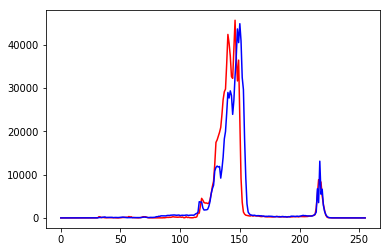

OG [0.5201801]


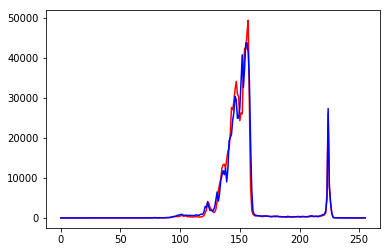

去紅線 [0.7949267]


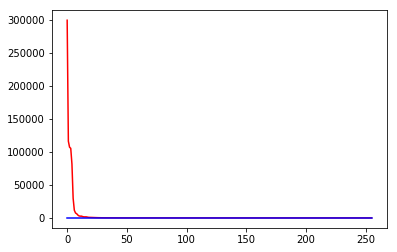

濾波B [0.56640625]


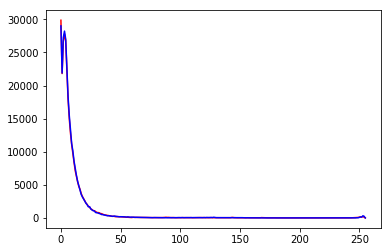

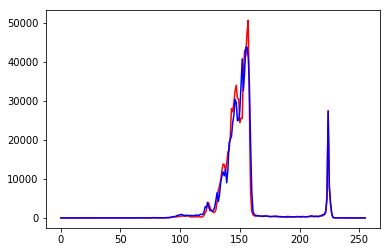

[0.78510743]
濾波A


In [43]:
rate=calculate(cv2.imread('Screen/transport/OG/OG001.jpg'),cv2.imread('Screen/transport/OG/OG008.jpg'))
print("OG",rate)
rate=calculate(cv2.imread('Screen/transport/Test/1-OG003.jpg'),cv2.imread('Screen/transport/Test/1-OG008.jpg'))
print("去紅線",rate)
rate=calculate(cv2.imread('Screen/transport/Test/2-OG003.jpg'),cv2.imread('Screen/transport/OG/2-OG008.jpg'))
print("濾波B",rate)
file1='Screen/transport/OG/OG003.jpg'
file2='Screen/transport/OG/OG008.jpg'
CompareAlgo(file1,file2)
print("濾波A")

## 前處理(去紅線)

In [117]:
#圖片,要不要存檔
def ImageProcess(imgpath,switch):
    #灰階讀進
    img=cv2.imread(imgpath,0)
    #膨脹
    kernel = np.ones((3,3), np.uint8)
    dilate = cv2.dilate(img, kernel, iterations = 1)

    #降噪(中值濾波)，彌平紅線條
    image_mid_blur =cv2.medianBlur(dilate, 9) 
       
    #高斯濾波(影像,捲積核,標準差)，模糊鋸齒狀
    Gaussian=cv2.GaussianBlur(image_mid_blur,(15,15),0)
    
    if switch == 1:
        #取檔案名
        #split處理檔名
        #注意斜線方向
        cv2.imwrite('Screen/transport/'+imgpath.split("/")[-1],image_mid_blur)

## CheckSum-計算單通道的直方圖的相似值

In [10]:
# 計算單通道的直方圖的相似值 
def calculate(image1,image2): 
    #cv2.calcHist(影像, 通道, 遮罩, 區間數量, 數值範圍)
    hist1 = cv2.calcHist([image1],[0],None,[256],[0.0,255.0]) 
    hist2 = cv2.calcHist([image2],[0],None,[256],[0.0,255.0]) 
    # 畫圖
    
    plt.plot(range(256),hist1,'r') 
    plt.plot(range(256),hist2,'b') 
    plt.show() 
    
    
    # 計算直方圖的重合度 
    degree = 0 
    for i in range(len(hist1)): 
        if hist1[i] != hist2[i]: 
            degree = degree + (1 - abs(hist1[i]-hist2[i])/max(hist1[i],hist2[i])) 
        else: 
            degree = degree + 1 
    degree = degree/len(hist1)
    
    return degree 

## 設定門檻

In [11]:
def CompareThreshold():
    #用兩兩比較出的數值當作門檻
    #設門檻0.969
    '''
    rate=calculate(cv2.imread('Screen/compare/c003.jpg'),
                    cv2.imread('Screen/compare/c004.jpg'))
    '''
    #0.6881
    rate=calculate(cv2.imread('Screen/compare/c001.jpg'),cv2.imread('Screen/compare/c002.jpg'))
    return rate


## 合併比對

In [12]:
#(原圖,比較圖)
def CompareAlgo(file,file2):
    start = time.time()
    #確認重複檔名，避免比到舊的
    CheckFile(file)
    CheckFile(file2)
    
    #統一大小 function
    ChangeSize(file)
    ChangeSize(file2)
    
    #前處理影像 function 
    ImageProcess(file,1)
    ImageProcess(file2,1)
    
    #設定門檻 function
    threshold=CompareThreshold()
    
    #比對兩張相似度 function
    rate=calculate(cv2.imread('Screen/transport/'+file.split("/")[-1]),cv2.imread('Screen/transport/'+file2.split("/")[-1]))
    print(rate)
    #相似度再比對門檻值
    if rate<threshold:
        return False
    if rate>=threshold:
        return True

    end=time.time()
    '''
    print("執行時間：%f 秒" % (end - start))

    print(threshold)
    print(rate)
    '''

## 使用

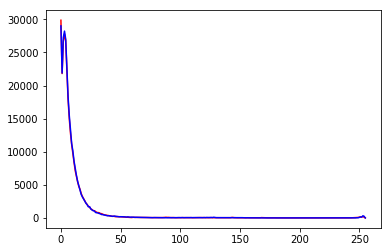

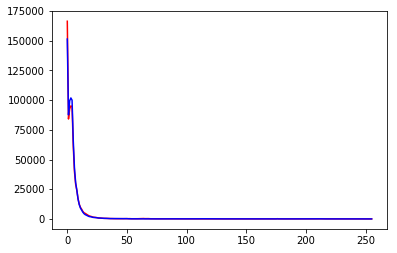

[0.5302638]


False